<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Subscription_Status_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

DATA EXTRACTION

In [18]:
shop = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/Regression/shopping_trends.csv")
shop.head(2), shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

(   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
 0            1   55   Male         Blouse  Clothing                     53   
 1            2   19   Male        Sweater  Clothing                     64   
 
    Location Size   Color  Season  Review Rating Subscription Status  \
 0  Kentucky    L    Gray  Winter           3.10                 Yes   
 1     Maine    L  Maroon  Winter           3.10                 Yes   
 
   Payment Method Shipping Type Discount Applied Promo Code Used  \
 0    Credit Card       Express              Yes             Yes   
 1  Bank Transfer       Express              Yes             Yes   
 
    Previous Purchases Preferred Payment Method Frequency of Purchases  
 0                  14                    Venmo            Fortnightly  
 1                   2                     Cash            Fortnightly  ,
 None)

DATA PREPROCESSING

---

In [19]:
shop_cop = shop.copy()

In [20]:
enc = LabelEncoder()

obj = shop_cop.select_dtypes(include='object').columns
for i in obj:
  shop_cop[i] = enc.fit_transform(shop_cop[i])

shop_cop.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.10,1,2,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.10,1,0,1,1,1,2,1,3


DATA ANALYSIS

---

In [21]:
sns.set()

In [22]:
def plot_stype(data, x=None, y=None, style='hist', hue=None, **kwargs):
  plt.figure(figsize=(15,5))
  if style=='hist':
    sns.histplot(data=data, x=x, kde=True, kde_kws=dict(cut=3), **kwargs)
  elif style=='box':
    sns.boxplot(data=data, x=x, y=y, hue=hue, **kwargs)
  elif style=='scatter':
    sns.scatterplot(data=data, x=x, y=y, hue=hue, **kwargs)
  elif style=='count':
    sns.countplot(data=data, y=y, hue=hue, **kwargs)
  else:
    raise ValueError(f"Plot Style Unaccepted {style}")
  plt.show()

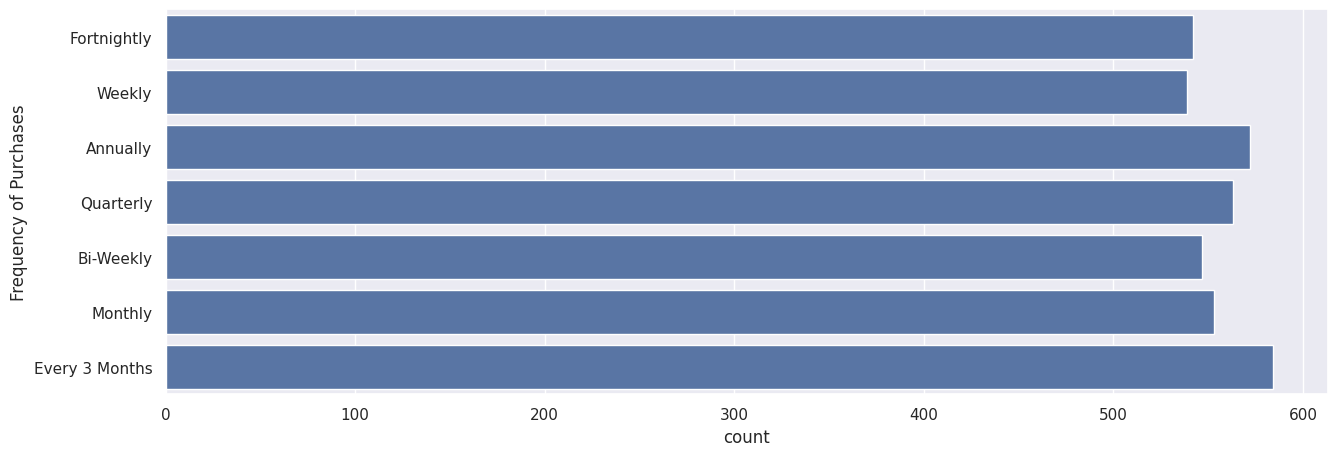

In [23]:
plot_stype(shop, y='Frequency of Purchases', style='count')

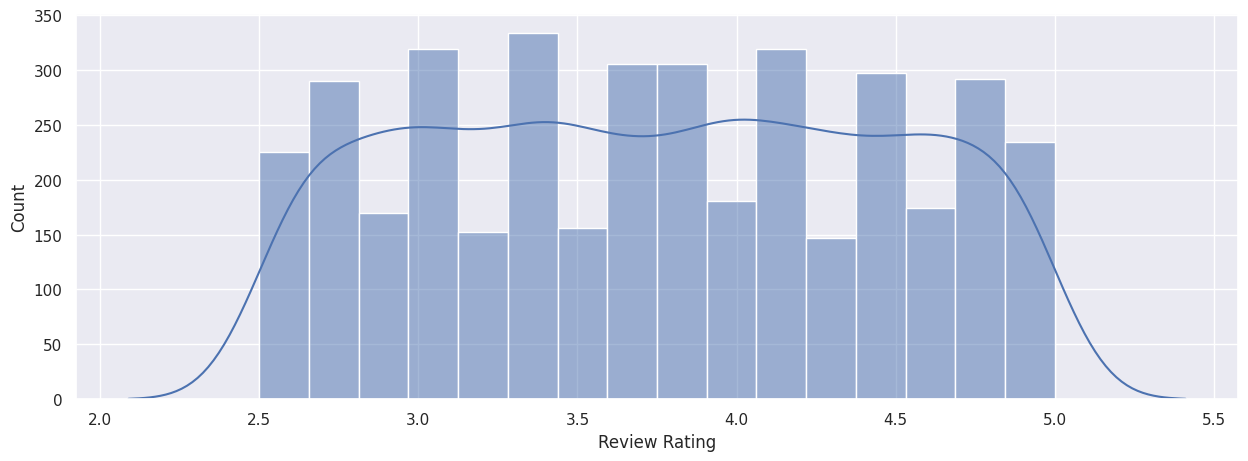

In [24]:
plot_stype(shop, x='Review Rating', style='hist')

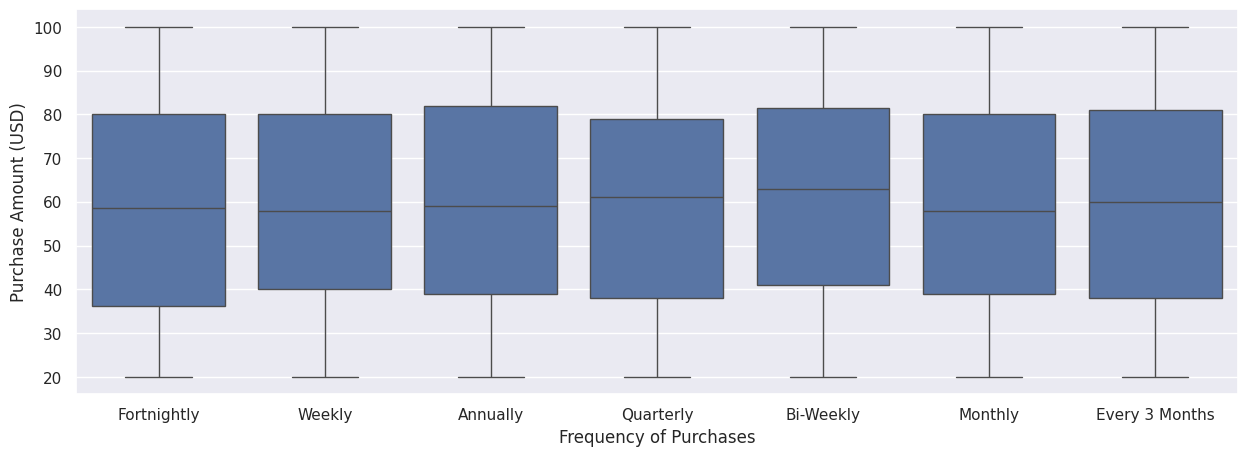

In [25]:
plot_stype(shop, x='Frequency of Purchases', y='Purchase Amount (USD)', style='box')

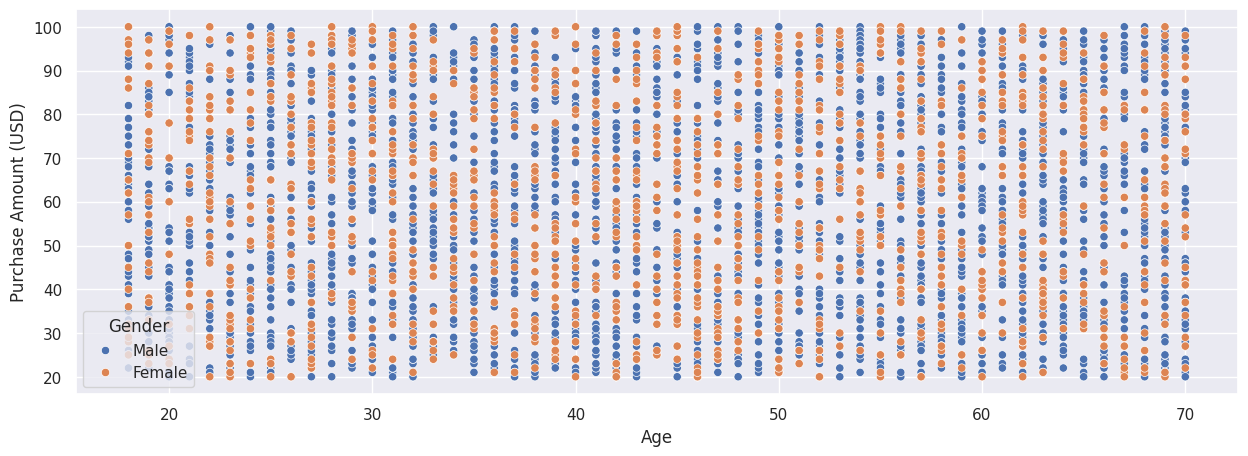

In [26]:
plot_stype(shop, x='Age', y='Purchase Amount (USD)', hue='Gender', style='scatter')

In [45]:
corr = shop_cop.corr()
print(corr['Subscription Status'].sort_values(ascending=False).round(3)*100)

Item Purchased             100.00
Category                     5.30
Color                        2.70
Location                     2.00
Shipping Type                1.60
Frequency of Purchases       1.50
Season                       1.30
Customer ID                  0.40
Subscription Status          0.30
Gender                       0.20
Age                         -0.10
Previous Purchases          -0.20
Review Rating               -0.50
Purchase Amount (USD)       -0.50
Preferred Payment Method    -0.70
Size                        -0.90
Discount Applied            -1.40
Promo Code Used             -1.40
Payment Method              -2.60
Name: Item Purchased, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [38]:
#X = pd.concat([shop_cop.iloc[:,1:7], shop_cop.iloc[:,8]], axis=1)
X = shop_cop.drop(columns=['Review Rating', 'Purchase Amount (USD)', 'Payment Method', 'Size', 'Customer ID'], axis=1)
y = shop_cop.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

claf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions= claf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 31/32 [00:08<00:00,  6.73it/s]

[LightGBM] [Info] Number of positive: 831, number of negative: 2289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266346 -> initscore=-1.013241
[LightGBM] [Info] Start training from score -1.013241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 32/32 [00:09<00:00,  3.47it/s]


In [44]:
models.head(10)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.06
BaggingClassifier,1.00,1.00,1.00,1.00,0.12
SVC,1.00,1.00,1.00,1.00,0.20
SGDClassifier,1.00,1.00,1.00,1.00,0.06
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.18
RidgeClassifier,1.00,1.00,1.00,1.00,0.07
RandomForestClassifier,1.00,1.00,1.00,1.00,0.58
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.12
Perceptron,1.00,1.00,1.00,1.00,0.09


In [40]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

MODEL EVALUATION

---

In [43]:
test_pred = clf.predict(X_test)
acc_scr = accuracy_score(y_test, test_pred)
print(f"Accuracy score for test is {acc_scr}")

Accuracy score for test is 1.0
